# CUSTOMER CHURN PREDICTION

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


# Importing Required Libraries

In [13]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Loading Dataset

In [14]:
# Load the churn dataset
df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

# Display the first 5 rows of the dataset
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Drop Irrelevant Columns**

In [15]:
# Removing columns that do not help in prediction (like IDs and Surname)
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Check the remaining columns
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Encode Categorical Variables**

In [16]:
# Encode 'Gender' column using Label Encoding (Male = 1, Female = 0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encode 'Geography' and drop first to avoid multicollinearity
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Check final dataset format
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


#  Exploratory Data Analysis (EDA)

Dataset shape: (10000, 12)

Target variable (Exited) distribution:
 Exited
0    7963
1    2037
Name: count, dtype: int64


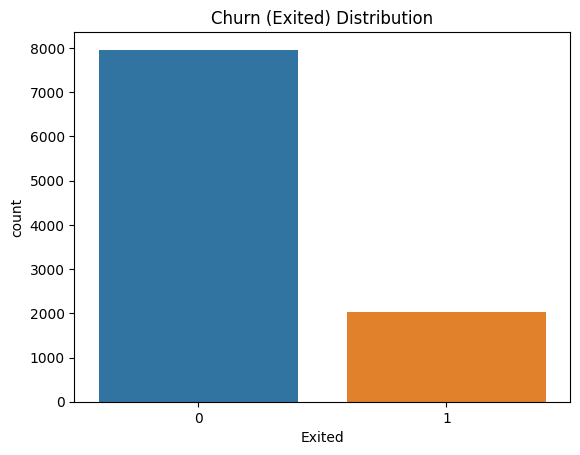

In [17]:
# Print dataset shape and target class distribution
print("Dataset shape:", df.shape)
print("\nTarget variable (Exited) distribution:\n", df['Exited'].value_counts())

# Plot churn count
sns.countplot(data=df, x='Exited')
plt.title('Churn (Exited) Distribution')
plt.show()


**Age vs. Churn & Correlation Matrix**

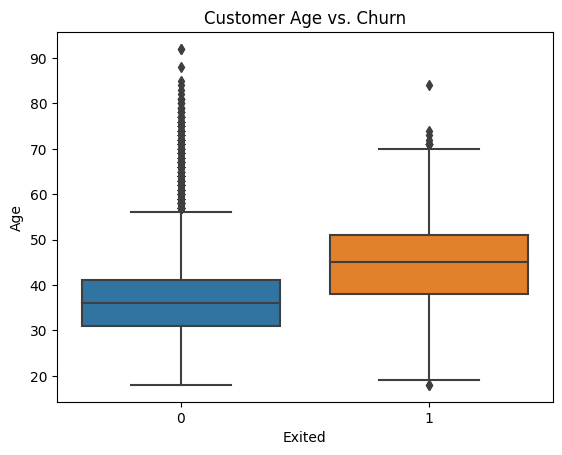

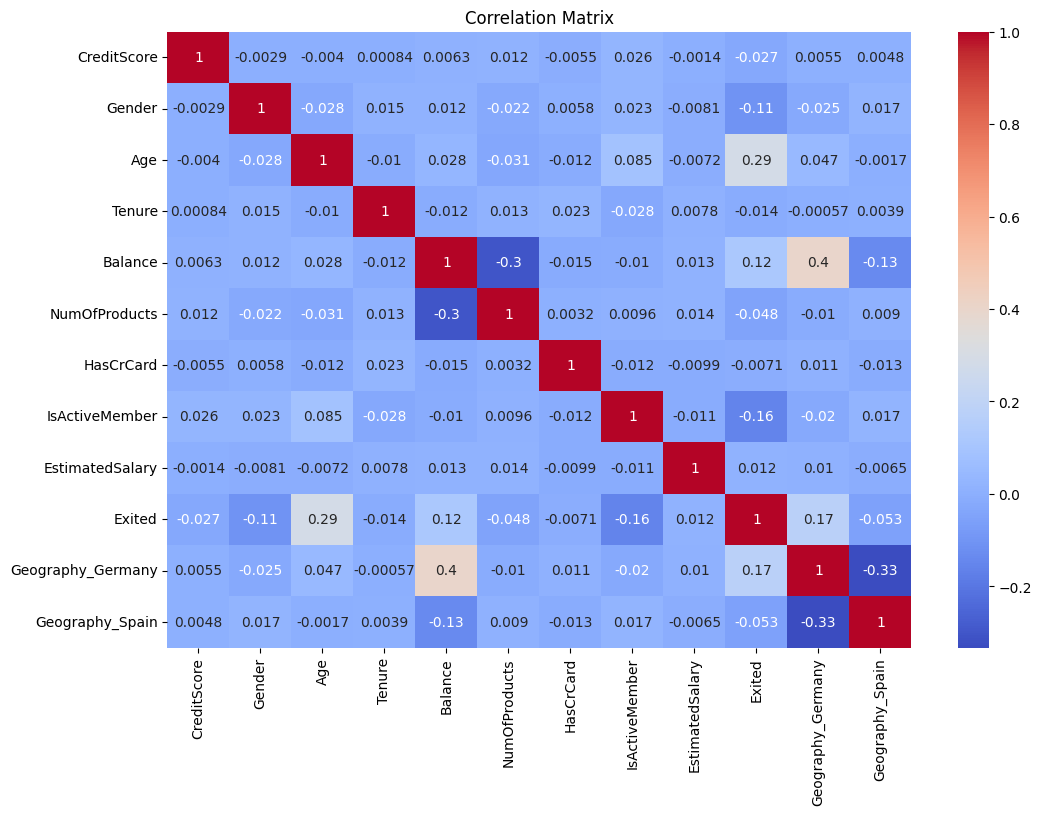

In [18]:
# Check how Age relates to Churn
sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Customer Age vs. Churn')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Splitting Features and Target**

In [19]:
# Define features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']


**Standardizing the Data**

In [20]:
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split

In [21]:
# Splitting dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train Logistic Regression Model

Logistic Regression Accuracy: 0.811
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



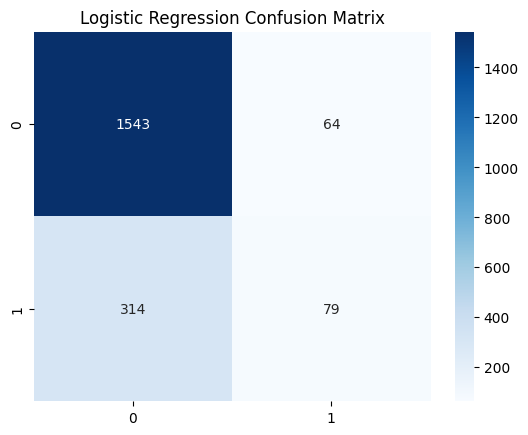

In [22]:
# Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Train Random Forest Model

Random Forest Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



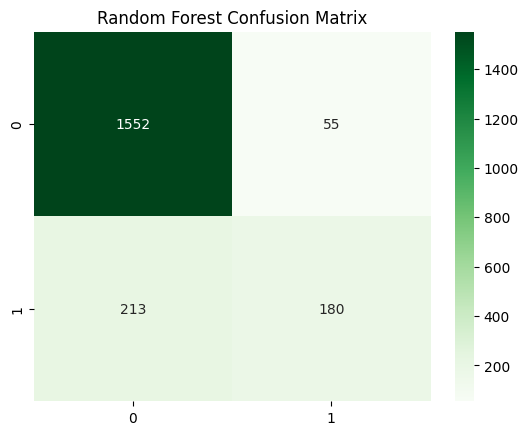

In [23]:
# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


# Train Gradient Boosting Model

Gradient Boosting Accuracy: 0.8675
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



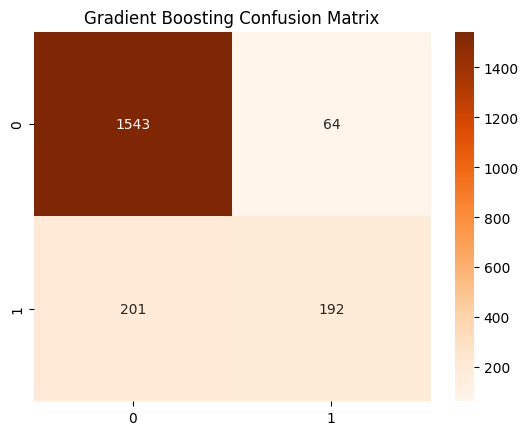

In [24]:
# Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


# Accuracy Comparison

In [25]:
# Print all models' accuracy scores
print("Model Accuracy Comparison:")
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting:", accuracy_score(y_test, y_pred_gb))


Model Accuracy Comparison:
Logistic Regression: 0.811
Random Forest: 0.866
Gradient Boosting: 0.8675
